In [317]:
import os
import sklearn
import pandas as pd
import numpy as np
from __future__ import division
import collections
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
from sklearn.ensemble import GradientBoostingRegressor
import math
import csv
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
import urllib
from sklearn.svm import LinearSVC


## Folder and path parameters

In [318]:
data_dir = "./Data"
kaggle_dir = os.path.join(data_dir, "Kaggle")
kenpom_dir = os.path.join(data_dir, "Kenpom")
sr_dir = os.path.join(data_dir, "Sports_ref")

In [319]:
num_team_stats = 14
teams_pd = pd.read_csv(os.path.join(kaggle_dir, "Teams.csv"))
teams_list = teams_pd["TeamName"].tolist()
print(teams_list[0:10])

['Abilene Chr', 'Air Force', 'Akron', 'Alabama', 'Alabama A&M', 'Alabama St', 'Albany NY', 'Alcorn St', 'Alliant Intl', 'American Univ']


## Using Pandas to visualize data

In [320]:
reg_season_compact_pd = pd.read_csv(kaggle_dir + "/RegularSeasonCompactResults.csv")
reg_season_compact_pd.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [321]:
reg_season_detailed_pd = pd.read_csv(kaggle_dir + '/RegularSeasonDetailedResults.csv')
reg_season_detailed_pd.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [322]:
seasons_pd = pd.read_csv(kaggle_dir + '/Seasons.csv')
seasons_pd.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [323]:
teams_pd = pd.read_csv(kaggle_dir + '/Teams.csv')
teamList = teams_pd['TeamName'].tolist()
teams_pd["TeamName"] = teams_pd["TeamName"].replace("Chr", "Chrawoiefjoa")
print(teams_pd.head())
print(teamList[0])

   TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2018
1    1102    Air Force           1985          2018
2    1103        Akron           1985          2018
3    1104      Alabama           1985          2018
4    1105  Alabama A&M           2000          2018
Abilene Chr


In [324]:
sr_pd = pd.read_csv(sr_dir + "/2002_basic.csv", skiprows=1)
sr_pd.head()

,Rk,School,G,W,L,W-L%,SRS,SOS,W.1,L.1,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,Air Force,28,9,19,0.321,-0.95,3.23,3.0,11.0,...,331,465,0.712,154.0,614,327,228,39,390,NaN
1,2,Akron,31,10,21,0.323,-4.84,0.36,5.0,13.0,...,554,731,0.758,295.0,933,416,180,77,450,NaN
2,3,Alabama A&M,29,19,10,0.655,-11.33,-15.81,12.0,6.0,...,478,711,0.672,506.0,1217,426,395,116,504,NaN
3,4,Alabama-Birmingham,30,13,17,0.433,5.56,2.96,6.0,10.0,...,428,623,0.687,376.0,1117,433,231,87,448,NaN
4,5,Alabama State,32,19,13,0.594,-13.25,-14.15,12.0,6.0,...,483,755,0.640,389.0,1167,314,217,89,538,NaN


In [325]:
sr_pd = pd.read_csv(sr_dir + "/2002_adv.csv", skiprows=1)
sr_pd.head()

,Rk,School,G,W,L,W-L%,SRS,SOS,W.1,L.1,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
0,1,Air Force,28,9,19,0.321,-0.95,3.23,3.0,11.0,...,0.485,0.585,42.3,61.4,NaN,3.2,0.553,22.1,NaN,0.288
1,2,Akron,31,10,21,0.323,-4.84,0.36,5.0,13.0,...,0.311,0.559,47.5,58.7,NaN,4.4,0.506,18.9,NaN,0.350
2,3,Alabama A&M,29,19,10,0.655,-11.33,-15.81,12.0,6.0,...,0.339,0.494,49.3,52.3,NaN,6.7,0.458,17.7,NaN,0.238
3,4,Alabama-Birmingham,30,13,17,0.433,5.56,2.96,6.0,10.0,...,0.332,0.512,50.5,58.6,NaN,5.2,0.477,17.9,NaN,0.243
4,5,Alabama State,32,19,13,0.594,-13.25,-14.15,12.0,6.0,...,0.317,0.514,51.2,43.9,NaN,4.9,0.479,20.9,NaN,0.287


In [326]:
kenpom_pd = pd.read_csv(kenpom_dir + "/summaries/summary02.csv")
kenpom_pd.head()

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM
0,2002,Air Force,55.7833,327,54.1733,327,99.4506,190,103.8170,149,106.8100,283,105.4580,214,-1.64046,181
1,2002,Akron,66.7009,260,65.6394,251,102.6500,128,105.2430,130,110.8370,313,111.1810,295,-5.93802,227
2,2002,Alabama,69.7639,171,68.0142,170,108.2290,42,114.0460,24,96.0457,56,95.3126,32,18.73300,22
3,2002,Alabama A&M,81.6407,1,78.9833,1,97.8208,220,92.1604,304,90.6649,4,101.6930,136,-9.53265,262
4,2002,Alabama St.,68.1969,223,63.0507,305,94.9003,264,90.1231,312,93.9840,26,102.7400,159,-12.61680,272


In [327]:
kenpom_pd = pd.read_csv(kenpom_dir + "/Misc_stats_def/misc02.csv")
kenpom_pd.head()

,Season,TeamName,FG2Pct,RankFG2Pct,FG3Pct,RankFG3Pct,FTPct,RankFTPct,BlockPct,RankBlockPct,...,RankOppF3GRate,ARate,RankARate,OppARate,RankOppARate,StlRate,RankStlRate,OppStlRate,RankOppStlRate,DefensiveFingerprint
0,2002,Air Force,54.8061,4,37.2760,58,71.1828,92,6.8287,235,...,64,61.3508,48,47.3958,11,0.1412,11,0.1084,218,18.6
1,2002,Akron,48.4271,136,37.0600,62,75.7576,12,6.9726,226,...,201,57.3508,115,55.3594,167,0.0868,263,0.1140,260,2.0
2,2002,Alabama,50.6579,56,30.8677,290,73.5782,40,8.0468,176,...,191,50.5495,267,46.9880,8,0.1053,130,0.0881,53,7.9
3,2002,Alabama A&M,44.2636,284,31.5871,272,66.4157,253,9.4669,107,...,176,52.7370,217,52.4425,92,0.1665,1,0.1039,175,10.2
4,2002,Alabama St.,45.8801,244,33.4646,209,64.4444,286,5.7722,280,...,9,44.2424,315,48.7465,32,0.0985,181,0.1358,321,13.4


# Generating Necessary Dataframes

In [328]:
reg_season_compact_pd = pd.read_csv(os.path.join(kaggle_dir,'RegularSeasonCompactResults.csv'))
reg_season_compact_pd.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [329]:
conference_tourney_compact_pd = pd.read_csv(os.path.join(kaggle_dir,'ConferenceTourneyGames.csv'))
conference_tourney_compact_pd.head()

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273


In [330]:
NCAA_tourney_compact_pd = pd.read_csv(os.path.join(kaggle_dir,'NCAATourneyCompactResults.csv'))
NCAA_tourney_compact_pd.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [331]:
secondary_tourney_compact_pd = pd.read_csv(os.path.join(kaggle_dir,'NCAATourneyCompactResults.csv'))
secondary_tourney_compact_pd.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [332]:
teams_pd = pd.read_csv(os.path.join(kaggle_dir,'teams.csv'))
teamList = teams_pd['TeamName'].tolist()
teams_pd.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [333]:
conferences_pd = pd.read_csv(os.path.join(kaggle_dir,'conferences.csv'))
conferences_pd.head()

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


In [334]:
TeamConferences_pd = pd.read_csv(os.path.join(kaggle_dir,'TeamConferences.csv'))
TeamConferences_pd.head()

,Season,TeamID,ConfAbbrev
0,1985,1114,a_sun
1,1985,1147,a_sun
2,1985,1204,a_sun
3,1985,1209,a_sun
4,1985,1215,a_sun


# Functions below are for getting/checking specific stats

In [335]:
def getTeamName(team_id):
    '''
    Testing TeamName getter:
    >>> getTeamName(1105)
    'Alabama A&M'
    '''
    assert len(teams_pd.loc[teams_pd["TeamID"] == team_id].index) != 0, "can't find team Name :("
    
    return teams_pd.loc[teams_pd["TeamID"] == team_id].values[0][1]

In [336]:
def getTeamID(team_name):
    '''
    Testing TeamID getter:
    >>> getTeamID('North Carolina')
    1314
    '''
    assert len(teams_pd.loc[teams_pd["TeamName"] == team_name].index) != 0, "can't find team ID :("
    
    return teams_pd.loc[teams_pd['TeamName'] == team_name].values[0][0]

## Functions for handling the differences in naming btw the csvs

In [337]:
def handleKemponCsvs(df):
    df['TeamName'] = df['TeamName'].replace("St\.", "St", regex=True)
    df['TeamName'] = df['TeamName'].replace("Saint Joseph's", "St Joseph's PA")
    df['TeamName'] = df['TeamName'].replace("Saint Mary's", "St Mary's CA")
    df['TeamName'] = df['TeamName'].replace("Saint", "St", regex = True)
    df['TeamName'] = df['TeamName'].replace("Albany", "Albany NY")
    df['TeamName'] = df['TeamName'].replace("American", "American Univ")
    df['TeamName'] = df['TeamName'].replace("Arkansas Little Rock", "Ark Little Rock")
    df['TeamName'] = df['TeamName'].replace("Arkansas Pine Bluff", "Ark Pine Bluff")
    df['TeamName'] = df['TeamName'].replace("Bethune Cookman", "Bethune-Cookman")
    df['TeamName'] = df['TeamName'].replace("Birmingham Southern", "Birmingham So")
    df['TeamName'] = df['TeamName'].replace("Boston University", "Boston Univ")
    df['TeamName'] = df['TeamName'].replace("Cal Poly", "Cal Poly SLO")
    df['TeamName'] = df['TeamName'].replace("Central Michigan", "C Michigan")
    df['TeamName'] = df['TeamName'].replace("Central Connecticut", "Central Conn")
    df['TeamName'] = df['TeamName'].replace("Charleston Southern", "Charleston So")
    df['TeamName'] = df['TeamName'].replace("Coastal Carolina", "Coastal Car")
    df['TeamName'] = df['TeamName'].replace("College of Charleston", "Col Charleston")
    df['TeamName'] = df['TeamName'].replace("Eastern Illinois", "E Illinois")
    df['TeamName'] = df['TeamName'].replace("Eastern Kentucky", "E Kentucky")
    df['TeamName'] = df['TeamName'].replace("Eastern Michigan", "E Michigan")
    df['TeamName'] = df['TeamName'].replace("Eastern Washington", "E Washington")
    df['TeamName'] = df['TeamName'].replace("Fairleigh Dickinson", "F Dickinson")
    df['TeamName'] = df['TeamName'].replace("Florida Atlantic", "FL Atlantic")
    df['TeamName'] = df['TeamName'].replace("George Washington", "G Washington")
    df['TeamName'] = df['TeamName'].replace("Georgia Southern", "Ga Southern")
    df['TeamName'] = df['TeamName'].replace("Illinois Chicago", "IL Chicago")
    df['TeamName'] = df['TeamName'].replace("Kent St", "Kent")
    df['TeamName'] = df['TeamName'].replace("Loyola Marymount", "Loy Marymount")
    df['TeamName'] = df['TeamName'].replace("Loyola Chicago", "Loyola-Chicago")
    df['TeamName'] = df['TeamName'].replace("Maryland Eastern Shore", "MD E Shore")
    df['TeamName'] = df['TeamName'].replace("Middle Tennessee", "MTSU")
    df['TeamName'] = df['TeamName'].replace("Mississippi Valley St", "MS Valley St")
    df['TeamName'] = df['TeamName'].replace("Northern Illinois", "N Illinois")
    df['TeamName'] = df['TeamName'].replace("North Carolina A&T", "NC A&T")
    df['TeamName'] = df['TeamName'].replace("North Carolina St", "NC State")
    df['TeamName'] = df['TeamName'].replace("Prairie View A&M", "Prairie View")
    df['TeamName'] = df['TeamName'].replace("South Carolina St", "S Carolina St")
    df['TeamName'] = df['TeamName'].replace("Southeastern Louisiana", "SE Louisiana")
    df['TeamName'] = df['TeamName'].replace("Southeast Missouri St", "SE Missouri St")
    df['TeamName'] = df['TeamName'].replace("Stephen F. Austin", "SF Austin")
    df['TeamName'] = df['TeamName'].replace("Tennessee Martin", "TN Martin")
    df['TeamName'] = df['TeamName'].replace("Troy St", "Troy")
    df['TeamName'] = df['TeamName'].replace("Texas Southern", "TX Southern")
    df['TeamName'] = df['TeamName'].replace("Western Carolina", "W Carolina")
    df['TeamName'] = df['TeamName'].replace("Western Illinois", "W Illinois")
    df['TeamName'] = df['TeamName'].replace("Western Kentucky", "WKU")
    df['TeamName'] = df['TeamName'].replace("Western Michigan", "W Michigan")
    return df

In [338]:
def handleSrCsvs(df):
    df['School'] = df['School'].replace(' NCAA', '', regex=True)
    df['School'] = df['School'].replace('(State)', 'St', regex=True)
    df['School'] = df['School'].replace('St\.', 'St', regex=True) 
    df['School'] = df['School'].replace('Albany (NY)', 'Albany NY') 
    df['School'] = df['School'].replace('Boston University', 'Boston Univ')
    df['School'] = df['School'].replace('Central Michigan', 'C Michigan')
    df['School'] = df['School'].replace('(Eastern)', 'E', regex=True)
    df['School'] = df['School'].replace('Louisiana St', 'LSU')
    df['School'] = df['School'].replace('North Carolina St', 'NC State')
    df['School'] = df['School'].replace('Southern California', 'USC')
    df['School'] = df['School'].replace('University of California', 'California', regex=True) 
    df['School'] = df['School'].replace('American', 'American Univ')
    df['School'] = df['School'].replace('Arkansas-Little Rock', 'Ark Little Rock')
    df['School'] = df['School'].replace('Arkansas-Pine Bluff', 'Ark Pine Bluff')
    df['School'] = df['School'].replace('Bowling Green St', 'Bowling Green')
    df['School'] = df['School'].replace('Brigham Young', 'BYU')
    df['School'] = df['School'].replace('Cal Poly', 'Cal Poly SLO')
    df['School'] = df['School'].replace('Centenary (LA)', 'Centenary')
    df['School'] = df['School'].replace('Central Connecticut St', 'Central Conn')
    df['School'] = df['School'].replace('Charleston Southern', 'Charleston So')
    df['School'] = df['School'].replace('Coastal Carolina', 'Coastal Car')
    df['School'] = df['School'].replace('College of Charleston', 'Col Charleston')
    df['School'] = df['School'].replace('Cal St Fullerton', 'CS Fullerton')
    df['School'] = df['School'].replace('Cal St Sacramento', 'CS Sacramento')
    df['School'] = df['School'].replace('Cal St Bakersfield', 'CS Bakersfield')
    df['School'] = df['School'].replace('Cal St Northridge', 'CS Northridge')
    df['School'] = df['School'].replace('East Tennessee St', 'ETSU')
    df['School'] = df['School'].replace('Detroit Mercy', 'Detroit')
    df['School'] = df['School'].replace('Fairleigh Dickinson', 'F Dickinson')
    df['School'] = df['School'].replace('Florida Atlantic', 'FL Atlantic')
    df['School'] = df['School'].replace('Florida Gulf Coast', 'FL Gulf Coast')
    df['School'] = df['School'].replace('Florida International', 'Florida Intl')
    df['School'] = df['School'].replace('George Washington', 'G Washington')
    df['School'] = df['School'].replace('Georgia Southern', 'Ga Southern')
    df['School'] = df['School'].replace('Gardner-Webb', 'Gardner Webb')
    df['School'] = df['School'].replace('Illinois-Chicago', 'IL Chicago')
    df['School'] = df['School'].replace('Kent St', 'Kent')
    df['School'] = df['School'].replace('Long Island University', 'Long Island')
    df['School'] = df['School'].replace('Loyola Marymount', 'Loy Marymount')
    df['School'] = df['School'].replace('Loyola (MD)', 'Loyola MD')
    df['School'] = df['School'].replace('Loyola (IL)', 'Loyola-Chicago')
    df['School'] = df['School'].replace('Massachusetts', 'MA Lowell')
    df['School'] = df['School'].replace('Maryland-Eastern Shore', 'MD E Shore')
    df['School'] = df['School'].replace('Miami (FL)', 'Miami FL')
    df['School'] = df['School'].replace('Miami (OH)', 'Miami OH')
    df['School'] = df['School'].replace('Missouri-Kansas City', 'Missouri KC')
    df['School'] = df['School'].replace('Monmouth', 'Monmouth NJ')
    df['School'] = df['School'].replace('Mississippi Valley St', 'MS Valley St')
    df['School'] = df['School'].replace('Montana St', 'MTSU')
    df['School'] = df['School'].replace('Northern Colorado', 'N Colorado')
    df['School'] = df['School'].replace('North Dakota St', 'N Dakota St')
    df['School'] = df['School'].replace('Northern Illinois', 'N Illinois')
    df['School'] = df['School'].replace('Northern Kentucky', 'N Kentucky')
    df['School'] = df['School'].replace('North Carolina A&T', 'NC A&T')
    df['School'] = df['School'].replace('North Carolina Central', 'NC Central')
    df['School'] = df['School'].replace('Pennsylvania', 'Penn')
    df['School'] = df['School'].replace('South Carolina St', 'S Carolina St')
    df['School'] = df['School'].replace('Southern Illinois', 'S Illinois')
    df['School'] = df['School'].replace('UC-Santa Barbara', 'Santa Barbara')
    df['School'] = df['School'].replace('Southeastern Louisiana', 'SE Louisiana')
    df['School'] = df['School'].replace('Southeast Missouri St', 'SE Missouri St')
    df['School'] = df['School'].replace('Stephen F. Austin', 'SF Austin')
    df['School'] = df['School'].replace('Southern Methodist', 'SMU')
    df['School'] = df['School'].replace('Southern Mississippi', 'Southern Miss')
    df['School'] = df['School'].replace('Southern', 'Southern Univ')
    df['School'] = df['School'].replace('St Bonaventure', 'St Bonaventure')
    df['School'] = df['School'].replace('St Francis (NY)', 'St Francis NY')
    df['School'] = df['School'].replace('Saint Francis (PA)', 'St Francis PA')
    df['School'] = df['School'].replace('St John\'s (NY)', 'St John\'s')
    df['School'] = df['School'].replace('Saint Joseph\'s', 'St Joseph\'s PA')
    df['School'] = df['School'].replace('Saint Louis', 'St Louis')
    df['School'] = df['School'].replace('Saint Mary\'s (CA)', 'St Mary\'s CA')
    df['School'] = df['School'].replace('Mount Saint Mary\'s', 'Mt St Mary\'s')
    df['School'] = df['School'].replace('Saint Peter\'s', 'St Peter\'s')
    df['School'] = df['School'].replace('Texas A&M-Corpus Christian', 'TAM C. Christian')
    df['School'] = df['School'].replace('Texas Christian', 'TCU')
    df['School'] = df['School'].replace('Tennessee-Martin', 'TN Martin')
    df['School'] = df['School'].replace('Texas-Rio Grande Valley', 'UTRGV')
    df['School'] = df['School'].replace('Texas Southern', 'TX Southern')
    df['School'] = df['School'].replace('Alabama-Birmingham', 'UAB')
    df['School'] = df['School'].replace('UC-Davis', 'UC Davis')
    df['School'] = df['School'].replace('UC-Irvine', 'UC Irvine')
    df['School'] = df['School'].replace('UC-Riverside', 'UC Riverside')
    df['School'] = df['School'].replace('Central Florida', 'UCF')
    df['School'] = df['School'].replace('Louisiana-Lafayette', 'ULL')
    df['School'] = df['School'].replace('Louisiana-Monroe', 'ULM')
    df['School'] = df['School'].replace('Maryland-Baltimore County', 'UMBC')
    df['School'] = df['School'].replace('North Carolina-Asheville', 'UNC Asheville')
    df['School'] = df['School'].replace('North Carolina-Greensboro', 'UNC Greensboro')
    df['School'] = df['School'].replace('North Carolina-Wilmington', 'UNC Wilmington')
    df['School'] = df['School'].replace('Nevada-Las Vegas', 'UNLV')
    df['School'] = df['School'].replace('Texas-Arlington', 'UT Arlington')
    df['School'] = df['School'].replace('Texas-San Antonio', 'UT San Antonio')
    df['School'] = df['School'].replace('Texas-El Paso', 'UTEP')
    df['School'] = df['School'].replace('Virginia Commonwealth', 'VA Commonwealth')
    df['School'] = df['School'].replace('Western Carolina', 'W Carolina')
    df['School'] = df['School'].replace('Western Illinois', 'W Illinois')
    df['School'] = df['School'].replace('Western Kentucky', 'WKU')
    df['School'] = df['School'].replace('Western Michigan', 'W Michigan')
    df['School'] = df['School'].replace('Abilene Christian', 'Abilene Chr')
    df['School'] = df['School'].replace('Montana State', 'Montana St')
    df['School'] = df['School'].replace('Central Arkansas', 'Cent Arkansas')
    df['School'] = df['School'].replace('Houston Baptist', 'Houston Bap')
    df['School'] = df['School'].replace('South Dakota St', 'S Dakota St')
    df['School'] = df['School'].replace('Maryland-Eastern Shore', 'MD E Shore')
    return df

In [339]:
#list of power six conferences
PowerSix = ['sec', 'acc', 'big_east', 'pac_twelve', 'pac_ten', 'big_ten', 'big_twelve']

In [340]:
def checkPower6(team_name, year):
    '''
    Testing power6 checker:
    >>> checkPower6("Stanford", "2002")
    1
    '''
    assert len(year) == 4, "Year format must be the ending year, and a string; eg: '2002'"
    
    team_id = getTeamID(team_name)
    year_conference_pd = TeamConferences_pd[TeamConferences_pd['Season'] == int(year)]
     
    if len(year_conference_pd[year_conference_pd['TeamID'] == team_id]) == 0:
        return "missing"
    elif year_conference_pd[year_conference_pd["TeamID"] == team_id].values[0][2] in PowerSix:
        return 1
    else:
        return 0

In [341]:
def getNumWins(team_name, season):
    '''
    >>> getNumWins('Air Force', '2002')
    9
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_basic.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][3]

In [342]:
def getWinPercentage(team_name, season):
    '''
    >>> getWinPercentage("Air Force", "2002")
    0.321
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_basic.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][5]

In [343]:
def getPpg(team_name, season):
    '''
    >>> getPpg("Air Force", "2002")
    57.32142857142857
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_basic.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][14] / sr_pd.loc[sr_pd["School"] == team_name].values[0][2]
getPpg("Air Force", "2002")

57.32142857142857

In [344]:
def getAdjTempo(team_name, season):
    '''
    >>> getAdjTempo("St John's", "2002")
    69.1465
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    kenpom_pd = pd.read_csv(os.path.join(kenpom_dir, "summaries", "summary" + season[2:] + ".csv"))
    kenpom_pd = handleKemponCsvs(kenpom_pd)
    if len(kenpom_pd.loc[kenpom_pd["TeamName"] == team_name].index) == 0:
        return "missing"
    return kenpom_pd.loc[kenpom_pd["TeamName"] == team_name].values[0][4]

In [345]:
def getTurnoverRate(team_name, season):
    '''
    >>> getTurnoverRate("Air Force", "2002")
    0.221
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_adv.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][27] / 100

In [346]:
def getEfg(team_name, season):
    '''
    >>> getEfg("Air Force", "2002")
    0.5529999999999999
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_adv.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][26]

In [347]:
def getFtm(team_name, season):
    '''
    >>> getFtm("Air Force", "2002")
    331
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_basic.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][24]

In [348]:
def getFtPercent(team_name, season):
    '''
    >>> getFtPercent("Air Force", "2002")
    0.7120000000000001
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_basic.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][26]

In [349]:
def getStlPercentDef(team_name, season):
    '''
    >>> getStlPercentDef("Marshall", "2004")
    0.0824
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    kenpom_pd = pd.read_csv(os.path.join(kenpom_dir, "Misc_stats_def", "misc" + season[2:] + ".csv"))
    kenpom_pd = handleKemponCsvs(kenpom_pd)
    if len(kenpom_pd.loc[kenpom_pd["TeamName"] == team_name].index) == 0:
        return "missing"
    return kenpom_pd.loc[kenpom_pd["TeamName"] == team_name].values[0][26]

In [350]:
def getBlkPercentDef(team_name, season):
    '''
    >>> getBlkPercentDef("St John's", "2002")
    0.09740299999999999
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    kenpom_pd = pd.read_csv(os.path.join(kenpom_dir, "Misc_stats_def", "misc" + season[2:] + ".csv"))
    kenpom_pd = handleKemponCsvs(kenpom_pd)
    if len(kenpom_pd.loc[kenpom_pd["TeamName"] == team_name].index) == 0:
        return "missing"
    return kenpom_pd.loc[kenpom_pd["TeamName"] == team_name].values[0][8] / 100

In [351]:
def getFgPercent(team_name, season):
    '''
    >>> getFgPercent("St John's", "2002")
    0.401
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_basic.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][20]

In [352]:
def get3pp(team_name, season):
    '''
    >>> get3pp("St John's", "2002")
    0.287
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_basic.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][23]

In [353]:
def get3pm(team_name, season):
    '''
    >>> get3pm("St John's", "2002")
    139
    '''
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002'"
    
    sr_pd = pd.read_csv(os.path.join(sr_dir, season + "_basic.csv"), skiprows=1)
    sr_pd = handleSrCsvs(sr_pd)
    if len(sr_pd.loc[sr_pd["School"] == team_name].index) == 0:
        return "missing"
    return sr_pd.loc[sr_pd["School"] == team_name].values[0][21]

In [354]:
import doctest
doctest.testmod(verbose=True)

Trying:
    checkPower6("Stanford", "2002")
Expecting:
    1
ok
Trying:
    get3pm("St John's", "2002")
Expecting:
    139
ok
Trying:
    get3pp("St John's", "2002")
Expecting:
    0.287
ok
Trying:
    getAdjTempo("St John's", "2002")
Expecting:
    69.1465
ok
Trying:
    getBlkPercentDef("St John's", "2002")
Expecting:
    0.09740299999999999
ok
Trying:
    getEfg("Air Force", "2002")
Expecting:
    0.5529999999999999
ok
Trying:
    getFgPercent("St John's", "2002")
Expecting:
    0.401
ok
Trying:
    getFtPercent("Air Force", "2002")
Expecting:
    0.7120000000000001
ok
Trying:
    getFtm("Air Force", "2002")
Expecting:
    331
ok
Trying:
    getNumWins('Air Force', '2002')
Expecting:
    9
ok
Trying:
    getPpg("Air Force", "2002")
Expecting:
    57.32142857142857
ok
Trying:
    getStlPercentDef("Marshall", "2004")
Expecting:
    0.0824
ok
Trying:
    getTeamID('North Carolina')
Expecting:
    1314
ok
Trying:
    getTeamName(1105)
Expecting:
    'Alabama A&M'
ok
Trying:
    getTurno

TestResults(failed=0, attempted=16)

### Create a dictionary of all the stat getters

In [222]:
stat_getters = {}
stat_getters[0] = checkPower6
stat_getters[1] = getNumWins
stat_getters[2] = getWinPercentage
stat_getters[3] = getPpg
stat_getters[4] = getAdjTempo
stat_getters[5] = getTurnoverRate
stat_getters[6] = getEfg
stat_getters[7] = getFtm
stat_getters[8] = getFtPercent
stat_getters[9] = getStlPercentDef
stat_getters[10] = getBlkPercentDef
stat_getters[11] = getFgPercent
stat_getters[12] = get3pp
stat_getters[13] = get3pm

## Additional Game data getters

In [223]:
def getLoc(row):
    if (row == 'H'):
        home = 1
    if (row == 'A'):
        home = -1
    if (row == 'N'):
        home = 0
    return home

# Getting the Season Vectors for each team and year :0

In [224]:
#creates the stat vector for a given team during a give season/year
def getSeasonVector(team_name, season):
    assert len(season) == 4, "Season format must be the ending year, and a string; eg: '2002', but was: " + season
    
#     # The data frame below holds stats for every single game in the given season
#     season_data = reg_season_compact_pd[reg_season_compact_pd['Season'] == year]
#     print(season_data.head())
#     #number of games in the season
#     num_games = len(season_data.index)
    
    team_vector = []
    for i in range(num_team_stats):
        team_vector.append(stat_getters.get(i)(team_name, season))
    return np.array(team_vector)
getSeasonVector("Stanford", "2002")

array([1.00000000e+00, 2.00000000e+01, 6.67000000e-01, 8.06666667e+01,
       6.95261000e+01, 1.56000000e-01, 5.08000000e-01, 5.69000000e+02,
       7.00000000e-01, 7.01000000e-02, 1.01961000e-01, 4.51000000e-01,
       3.40000000e-01, 2.07000000e+02])

# Make a dictionary of every team and the respective season vector    

In [225]:
def createSeasonDict(season):
    print("SEASON = {0}".format(season))
    seasonDict = {}
    for team in teams_list:
        team_vector = getSeasonVector(team, str(season))
        
        #if any of the entries in the vector equals 0, then the team name wasn't present in one of the data files
        if not any(map(lambda x: x == "missing", team_vector)):
            seasonDict[team] = team_vector
    return seasonDict

In [226]:
#takes in a regularseason or a tourney df, returns the counter to keep track of training matrix index
def addGames(df, counter, team_vectors, xTrainSeason, yTrainSeason, neutral=False):
    for index, row in df.iterrows():
            #determine the difference vector for each game
            w_team = getTeamName(row['WTeamID'])
            l_team = getTeamName(row['LTeamID'])
            
            #make sure teams are in the seasonDictionary
            if team_vectors.get(w_team, np.array([False])).any() and team_vectors.get(l_team, np.array([False])).any():
                w_vector = team_vectors[w_team]
                l_vector = team_vectors[l_team]
                diff_vector = [a - b for a, b in zip(w_vector, l_vector)]
                
                if neutral:  
                    diff_vector.append(0)
                else:
                    diff_vector.append(getLoc(row['WLoc']))
                    
                #flip every odd numbered game
                if (counter % 2 == 0):
                    #predict the winning team
                    xTrainSeason[counter] = diff_vector
                    yTrainSeason[counter] = 1
                else:
                    #predict the losing team
                    xTrainSeason[counter] = [-x for x in diff_vector]
                    yTrainSeason[counter] = 0
                counter += 1
    return counter

In [227]:
def createTrainingSet(years):
    #calculating the dimensions of the training sets
    totalNumGames = 0
    for year in years:
        reg_season = reg_season_compact_pd[reg_season_compact_pd['Season'] == year]
        NCAA_tourney = NCAA_tourney_compact_pd[NCAA_tourney_compact_pd['Season'] == year]
        secondary_tourney = secondary_tourney_compact_pd[secondary_tourney_compact_pd['Season'] == year]
        conference_tourney = conference_tourney_compact_pd[conference_tourney_compact_pd['Season'] == year]
        totalNumGames += (len(reg_season.index) + len(conference_tourney.index) + len(NCAA_tourney.index) + len(secondary_tourney.index))
        
    statsLength = 15
    xTrain = np.zeros((totalNumGames, statsLength))
    yTrain = np.zeros((totalNumGames))
    seasonCounter = 0
    
    #create a training set for each season to put into the x and y Train
    for year in years:
        #get the team vectors for the year in iteration
        team_vectors = createSeasonDict(year)
        
        #get all of the games for the year in iteration
        reg_season = reg_season_compact_pd[reg_season_compact_pd['Season'] == year]
        NCAA_tourney = NCAA_tourney_compact_pd[NCAA_tourney_compact_pd['Season'] == year]
        secondary_tourney = secondary_tourney_compact_pd[secondary_tourney_compact_pd['Season'] == year]
        conference_tourney = conference_tourney_compact_pd[conference_tourney_compact_pd['Season'] == year]
        
        games_in_season = len(reg_season.index) + len(NCAA_tourney.index) + len(secondary_tourney.index) + len(conference_tourney.index)
        xTrainSeason = np.zeros((games_in_season, statsLength))
        yTrainSeason = np.zeros((games_in_season))
        counter = 0

        #add each game to the training vectors from the regular season
        counter = addGames(reg_season, counter, team_vectors, xTrainSeason, yTrainSeason, neutral=False)
            
        #add each game to the training vector from the NCAA tourney; games are always neutral    
        counter = addGames(NCAA_tourney, counter, team_vectors, xTrainSeason, yTrainSeason, neutral=True)
            
        #add each game to the training vector from the secondary tourneys
        counter = addGames(secondary_tourney, counter, team_vectors, xTrainSeason, yTrainSeason, neutral=False)

        xTrain[seasonCounter:games_in_season+seasonCounter] = xTrainSeason
        yTrain[seasonCounter:games_in_season+seasonCounter] = yTrainSeason
        seasonCounter += games_in_season
    return xTrain, yTrain

In [228]:
years = range(2002, 2019)
# xTrain, yTrain = createTrainingSet(years)
# np.save('xTrain2', xTrain)
# np.save('yTrain2', yTrain)

In [229]:
xTrain = np.load("xTrain2.npy")
yTrain = np.load("yTrain2.npy")

In [230]:
print(xTrain.shape)
print(xTrain[4])

(93008, 15)
[ 1.0000000e+00  2.0000000e+00  8.3000000e-02  1.1262069e+01
  8.8090000e+00 -5.0000000e-02  4.0000000e-03 -1.2000000e+01
 -2.1000000e-02  4.8800000e-02 -4.0965000e-02 -6.0000000e-03
 -1.0000000e-03  6.5000000e+01  1.0000000e+00]


In [231]:
print(yTrain.shape)
print(yTrain[0:30])

(93008,)
[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0.]


In [232]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=5)

In [233]:
def showDependency(predictions, test, stat, my_categories):
    difference = test[:,my_categories.index(stat)]
    plt.scatter(difference, predictions)
    plt.ylabel('Probability of Team 1 Win')
    plt.xlabel(stat + ' Difference (Team 1 - Team 2)')
    plt.show()

In [234]:
def showFeatureImportance(my_categories):
    fx_imp = pd.Series(model.feature_importances_, index=my_categories)
    fx_imp /= fx_imp.max()
    fx_imp.sort_values()
    fx_imp.plot(kind='barh')

In [235]:
categories=['Power6?','#Wins','Win%','PPG','AdjTempo', 'TO%','EFG%','FTM','FT%',
           'STL%','BLK%','FG%', '3point%', '3pm', 'location']
accuracy=[]

for i in range(1):
    X_train, X_test, Y_train, Y_test = train_test_split(xTrain, yTrain)
    results = model.fit(X_train, Y_train)
    preds = model.predict(X_test)

    preds[preds < .5] = 0
    preds[preds >= .5] = 1
    accuracy.append(np.mean(preds == Y_test))
    #accuracy.append(np.mean(predictions == Y_test))
    print("Finished iteration:", i)
print("The accuracy is", sum(accuracy)/len(accuracy))

Finished iteration: 0
The accuracy is 0.822681919834853


In [236]:
def predictGame(team_1_vector, team_2_vector, home):
    diff = [a - b for a, b in zip(team_1_vector, team_2_vector)]
    diff.append(home)
    return model.predict([diff]) 
    #return model.predict_proba([diff])

In [237]:
# This was the national championship matchup last year
team1_name = 'Virginia'
team2_name = 'UMBC'
team1_vector = getSeasonVector(team1_name, "2018")
team2_vector = getSeasonVector(team2_name, "2018")
print('Probability that ' + team1_name + ' wins:', predictGame(team1_vector, team2_vector, 0)[0])

Probability that Virginia wins: 0.8486965001505481


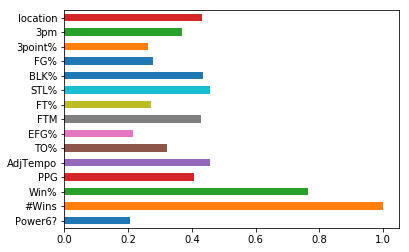

In [238]:
showFeatureImportance(categories)